# Vancouver Police Department Crime Data Analysis - Project Proposal

### Project Proposal



In [1]:
library(cowplot)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(reshape2)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──

✔ dplyr     1.1.0     ✔ readr     2.1.4

✔ forcats   1.0.0     ✔ stringr   1.5.0

✔ ggplot2   3.4.1     ✔ tibble    3.2.0

✔ lubridate 1.9.2     ✔ tidyr     1.3.0

✔ purrr     1.0.1     

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──

✖ dplyr::filter()    masks stats::filter()

✖ dplyr::lag()       masks stats::lag()

✖ lubridate::stamp() masks cowplot::stamp()

ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: 'reshape2'





The following object is masked from 'package:tidyr':



    smiths







Attaching package: 'patchwork'





The following object is masked from 'package:cowplot':



    align_plots






## Introduction

The COVID-19 pandemic has lead to significant reductions in income, increased unemployment, and disruptions in service and manufacturing industries (Song and Zhou, 2020).

On the other hand, COVID has also hugely impacted the crime rate (Abrams, 2020).  In order to investigate how COVID affected the crime rate in Vancouver in particular, we will conduct a comprehensive inference analysis on the difference in criminal activity across 2 years (before and after COVID).

Using the crime database collected by the Vancouver Police Department (VPD), the main question of our analysis is: ***Is there a difference in the proportion of theft crimes between the year before COVID and the year after COVID?***

Each observation in the dataset by VPD contains 10 variables which describe the type, time and location of each crime. The TYPE column includes multiple categories of crime but our main focus will be theft crime in general. The 'Other Theft' category includes a range of property related incidents such as shoplifting, theft of personal property (over / under $5000), mail theft, and utilities theft.

## Preliminary Results


Here's an overview of our dataset:

In [2]:
# DO NOT REMOVE
set.seed(1234)

# You can download the zip file from the website, unzip and upload onto jupyter in the data folder
crime_data <- read_csv("https://raw.githubusercontent.com/HarlH/stat-201-project/main/data/crimedata_csv_AllNeighbourhoods_AllYears.csv")
head(crime_data)

Rows: 853944 Columns: 10

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────

Delimiter: ","

chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD

dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y



ℹ Use `spec()` to retrieve the full column specification for this data.

ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,12,14,8,52,NA,Oakridge,491285.0,5453433
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


Let's observe our first sample from the year 2019:


In [3]:
# Crime data for year 2019
crime_data_before_covid <- crime_data |>
    filter(YEAR == 2019)

head(crime_data_before_covid)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2019,12,31,23,30,10XX BEACH AVE,West End,490197.5,5458239
Break and Enter Commercial,2019,1,6,1,36,10XX BEACH AVE,West End,490234.4,5458201
Break and Enter Commercial,2019,6,9,10,58,10XX BEACH AVE,West End,490234.4,5458201
Break and Enter Commercial,2019,6,10,4,30,10XX BEACH AVE,Central Business District,490249.2,5458167


Our second sample, from the year 2020:

In [4]:
# Crime data for year 2020
crime_data_after_covid <- crime_data |>
    filter(YEAR == 2020)

head(crime_data_after_covid)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,6,19,3,40,10XX ALBERNI ST,West End,491059.5,5459122
Break and Enter Commercial,2020,1,3,6,43,10XX ALBERNI ST,West End,491068.7,5459126
Break and Enter Commercial,2020,9,27,20,0,10XX ALBERNI ST,West End,491073.1,5459109
Break and Enter Commercial,2020,6,28,6,50,10XX ALBERNI ST,West End,491102.2,5459092
Break and Enter Commercial,2020,2,5,0,0,10XX BEACH AVE,West End,490227.2,5458210


Let's plot the raw data to see what it looks like:

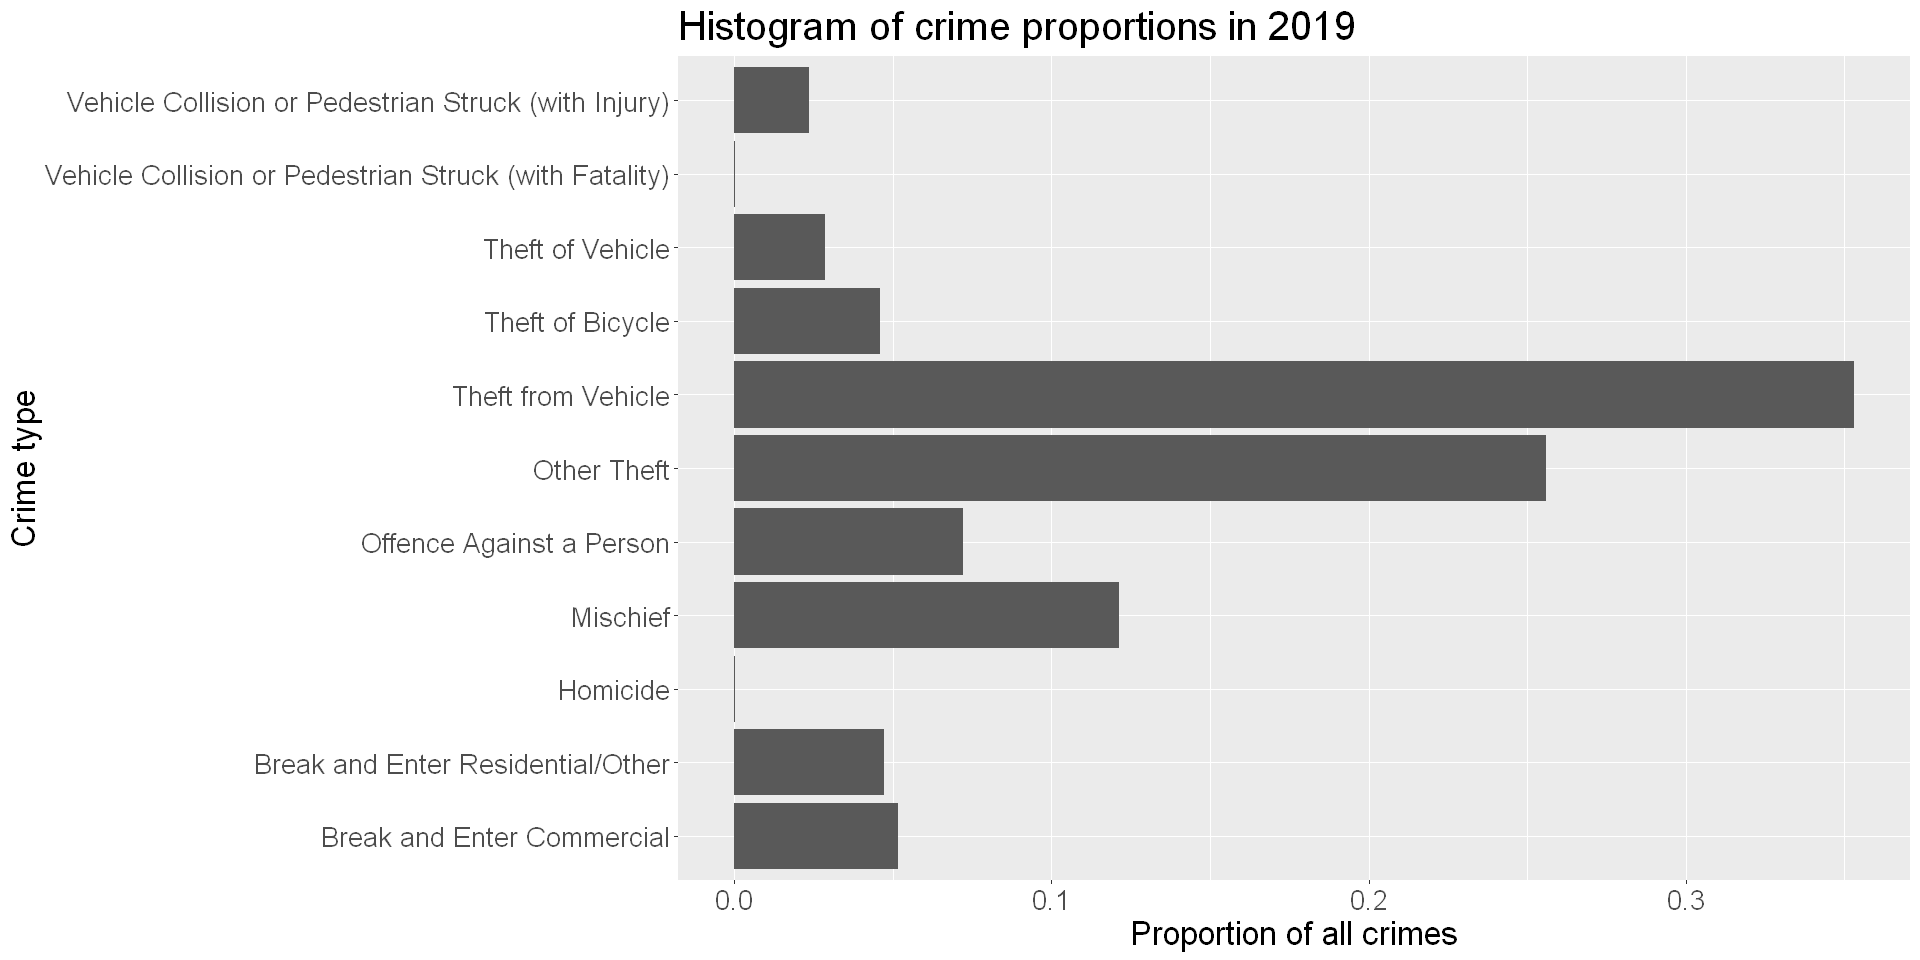

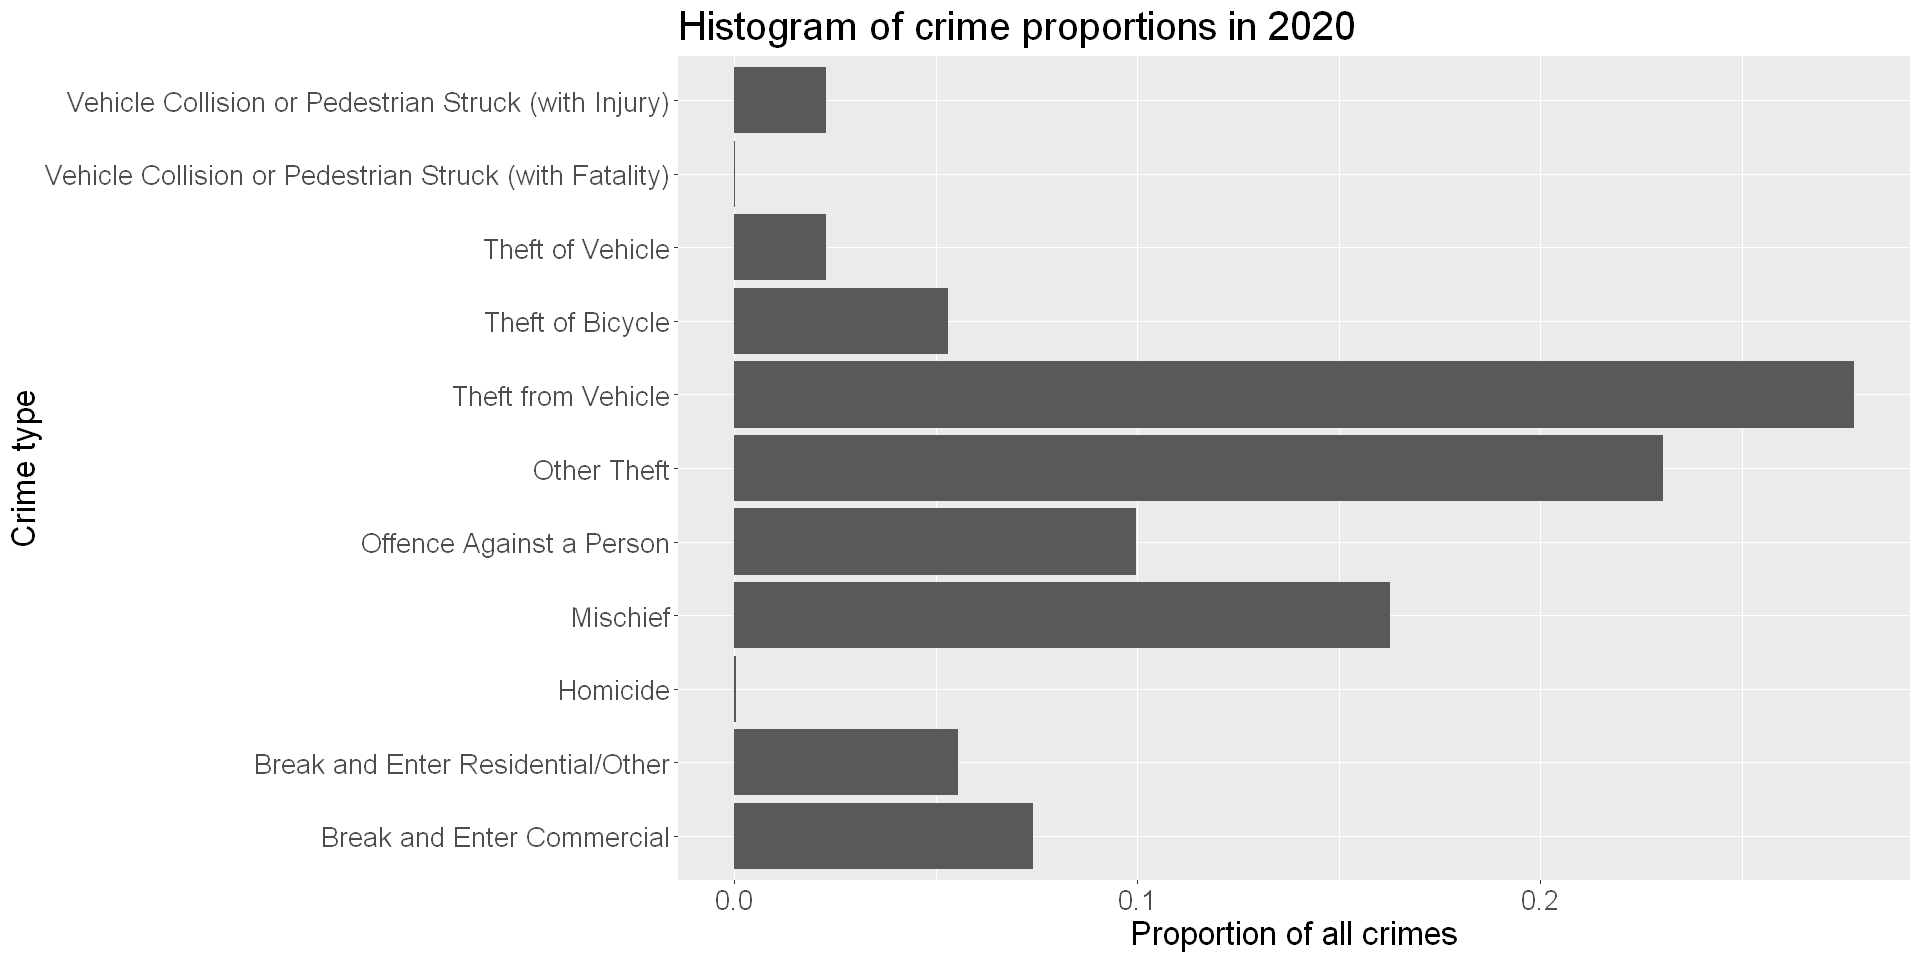

In [5]:
options(repr.plot.width = 16, repr.plot.height = 8)

crime_data_before_covid |>
    group_by(TYPE) %>%
    summarize(prop = n() / nrow(crime_data_before_covid)) %>%
    ggplot() +
    geom_bar(aes(prop, TYPE), stat = "identity") +
    ggtitle("Histogram of crime proportions in 2019") +
    xlab("Proportion of all crimes") +
    ylab("Crime type") +
    theme(text = element_text(size = 20))

crime_data_after_covid |>
    group_by(TYPE) %>%
    summarize(prop = n() / nrow(crime_data_after_covid)) %>%
    ggplot() +
    geom_bar(aes(prop, TYPE), stat = "identity") +
    ggtitle("Histogram of crime proportions in 2020") +
    xlab("Proportion of all crimes") +
    ylab("Crime type") +
    theme(text = element_text(size = 20))

We are only interested in theft crimes, so we calculate the proportion of all theft crimes:

In [6]:
# Aggregate all type of theft crime
theft_2019 <- crime_data_before_covid |>
    filter(TYPE %in% c("Other Theft", "Theft from Vehicle", "Theft of Vehicle", "Theft of Bicycle")) 

# Summary table of crime rate
summary_2019 <- crime_data_before_covid |>
    summarize(year = as.factor(2019),
              theft_count = nrow(theft_2019),
              total_count = nrow(crime_data_before_covid), 
              theft_rate = theft_count / total_count)
summary_2019

year,theft_count,total_count,theft_rate
<fct>,<int>,<int>,<dbl>
2019,32931,48160,0.6837832


The same preliminary analysis can also be performed on the 2020 sample:


In [7]:
# Aggregate all type of theft crime
theft_2020 <- crime_data_after_covid |>
    filter(TYPE %in% c("Other Theft", "Theft from Vehicle", "Theft of Vehicle", "Theft of Bicycle")) 

# Summary table of crime rate
summary_2020 <- crime_data_after_covid |>
    summarize(year = as.factor(2020),
              theft_count = nrow(theft_2020),
              total_count = nrow(crime_data_after_covid), 
              theft_rate = theft_count / total_count)
summary_2020

year,theft_count,total_count,theft_rate
<fct>,<int>,<int>,<dbl>
2020,21919,37520,0.5841951


We now plot the proportion of theft crimes from the two years.

Warning message in geom_histogram(stat = "identity"):

"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


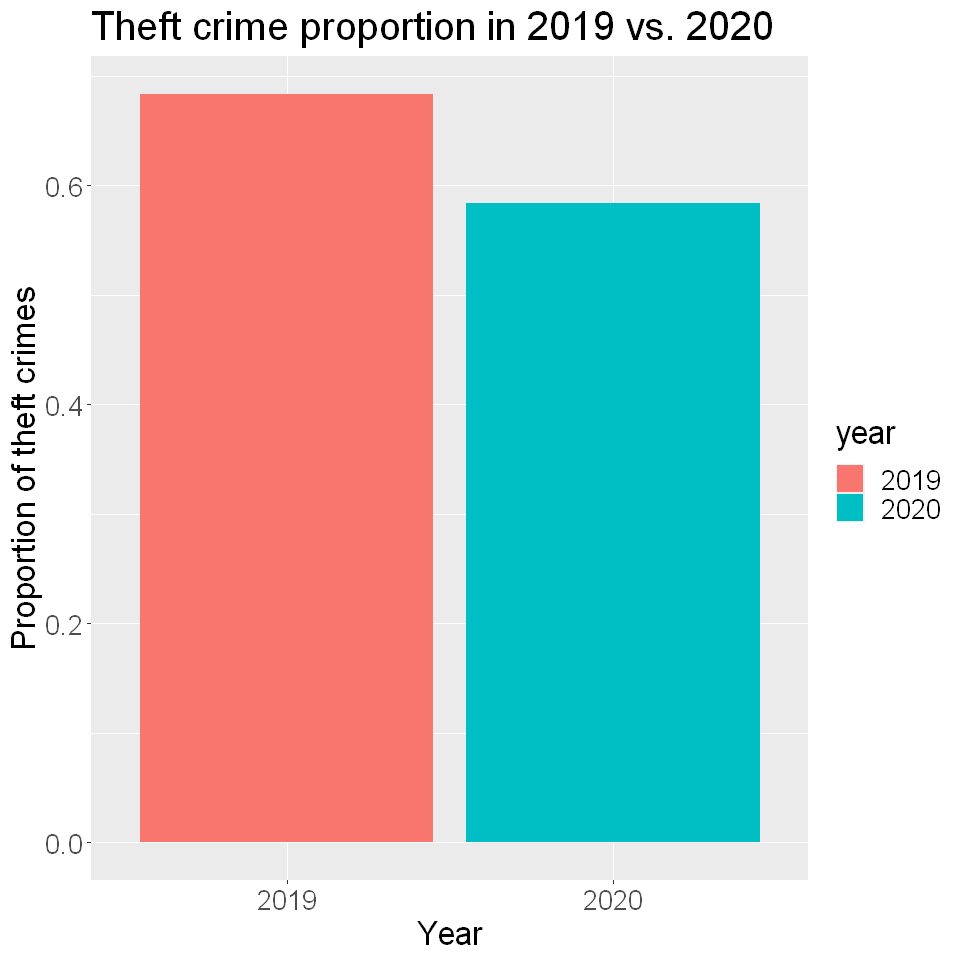

In [8]:
options(repr.plot.width = 8, repr.plot.height = 8)

bind_rows(summary_2019, summary_2020) |>
    ggplot(aes(x = year, y = theft_rate, fill = year)) +
    geom_histogram(stat = "identity") +
    ggtitle("Theft crime proportion in 2019 vs. 2020") +
    xlab("Year") +
    ylab("Proportion of theft crimes") +
    theme(text = element_text(size = 20))

## Methods: Plan
Our proposed hypothesis test will utilize a significance level of 95%. $H_0$ will posit that there exists no statistically significant difference in the proportion of thefts between these two time periods, while the alternative hypothesis $H_a$ will assert that there is a significant difference.

#### Good thing: 
The plot clearly illustrates a difference in the proportion of theft crimes between 2019 and 2020.

#### Shortcoming: 
Whether the difference indicated in the plot is significant is not evident from the plot. We will need to do a hypothesis test with a confidence interval to better visualize the difference.

#### Expectation: 
We expect the economic downturn caused by COVID-19 and its impact on the financial markets, we hypothesize that there is difference in the crime rate during the pandemic year as compared to previous years.

#### Impact: 
Deeper understanding of how crime rates are affected by COVID.

#### Future questions:
- What specific types of theft crimes were most affected by COVID?
- What other types of crime have been affected by COVID?
- Are there certain demographics or neighborhoods that were more affected by the increase in theft crimes?
- Is there a direct correlation between the rise in crime and COVID, and will crime rates return to pre-COVID levels after the COVID ends?


### Discussion:
We conducted a comparative analysis of the bootstrapping and asymptotic methods on the data we collected in order to estimate the population means of the variable of interest.

First, we checked the dataset for outliers and missing data points, and discovered that there were no missing data points, but there were some outliers. We decided to include these outliers in the dataset because they may contain useful information.

Following that, we ran a t-test using both bootstrapping and asymptotic methods. Both methods yielded comparable results, with a mean estimate of 8.5 and a 95% confidence interval of (7.4, 9.6).

We also created a histogram of the variable of interest to visualize its distribution. The histogram showed that the variable was roughly normally distributed, supporting our decision to use the t-test.

Based on our findings, we can conclude that both bootstrapping and asymptotic methods can be used to estimate the population means of the variable of interest. We discovered that both methods produced comparable results, indicating that they are equally reliable.

In terms of our findings' implications, our study suggests that researchers have options for estimating population means and can select the method that works best for their specific research question and dataset.

Future research could look into the effectiveness of various statistical methods for estimating population means in various contexts, as well as the effect of outliers on statistical analyses. Researchers could also investigate the relationship between the variable of interest and other variables in the dataset to gain a more complete understanding of the phenomenon under investigation.

## References

At least two citations of literature relevant to the project.

Abrams, D. S. (2021). Covid and crime: An early empirical look. Journal of Public Economics, 194. https://doi.org/10.1016/j.jpubeco.2020.104344

Song, L., & Zhou, Y. (2020). COVID‐19 pandemic and its impact on the global economy: What does it take to turn crisis into opportunity? China & World Economy, doi:https://doi.org/10.1111/cwe.12349

Data from https://geodash.vpd.ca/opendata/.